In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_excel('train.xlsx')
test=pd.read_excel('test.xlsx')

In [3]:

pd.set_option('display.max_columns', None)

In [4]:
df=train.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           7383 non-null   object 
 1   Index                 7383 non-null   object 
 2   Industry              7383 non-null   object 
 3   VWAP                  7345 non-null   float64
 4   General Index         7321 non-null   float64
 5   NAV                   7322 non-null   float64
 6   P/E Ratio             7149 non-null   float64
 7   Volumes Traded        7115 non-null   float64
 8   Inventory Turnover    6984 non-null   float64
 9   Covid Impact (Beta)   7007 non-null   float64
 10  Tracking Error        7312 non-null   float64
 11  Dollar Exchange Rate  7306 non-null   float64
 12  Put-Call Ratio        7298 non-null   float64
 13  P/B Ratio             7358 non-null   float64
 14  Stock Price           7383 non-null   float64
dtypes: float64(12), objec

In [6]:
df['Industry'].value_counts()

Energy              1521
Materials           1515
Real Estate         1475
Information Tech    1451
Healthcare          1421
Name: Industry, dtype: int64

In [7]:
Industry=pd.get_dummies(df['Industry'])


In [8]:
df.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [9]:
df= pd.concat([df,Industry], axis = 1)

In [10]:
df

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price,Energy,Healthcare,Information Tech,Materials,Real Estate
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852,0,0,0,0,1
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622,0,0,1,0,0
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874,0,0,1,0,0
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632,0,0,0,1,0
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7378,AC3230,NSE,Healthcare,773.91,11270.15,40.28,61.37,19212221.0,4.34,0.78,0.0340,74.9,0.98,NaN,248.019321,0,1,0,0,0
7379,AC3231,JSE,Information Tech,61.97,55722.00,79.56,62.90,8108942.0,3.48,0.23,0.0528,17.7,0.84,NaN,494.555631,0,0,1,0,0
7380,AC3232,JSE,Materials,131.99,55722.00,26.16,198.77,8382586.0,3.04,0.03,0.0359,17.7,1.22,NaN,500.869063,0,0,0,1,0
7381,AC3233,S&P 500,Materials,643.72,3351.28,29.24,38.83,18638400.0,2.66,0.03,0.0581,1.0,1.04,NaN,113.170686,0,0,0,1,0


In [11]:
df=df.drop(['Energy','Industry','Index','Stock Index'],axis=1)

In [12]:
df.head()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price,Healthcare,Information Tech,Materials,Real Estate
0,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852,0,0,0,1
1,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622,0,1,0,0
2,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874,0,1,0,0
3,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632,0,0,1,0
4,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534,0,0,0,1


In [13]:
df.isnull().sum()

VWAP                     38
General Index            62
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)     376
Tracking Error           71
Dollar Exchange Rate     77
Put-Call Ratio           85
P/B Ratio                25
Stock Price               0
Healthcare                0
Information Tech          0
Materials                 0
Real Estate               0
dtype: int64

In [14]:
df=df.fillna(0)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   VWAP                  7383 non-null   float64
 1   General Index         7383 non-null   float64
 2   NAV                   7383 non-null   float64
 3   P/E Ratio             7383 non-null   float64
 4   Volumes Traded        7383 non-null   float64
 5   Inventory Turnover    7383 non-null   float64
 6   Covid Impact (Beta)   7383 non-null   float64
 7   Tracking Error        7383 non-null   float64
 8   Dollar Exchange Rate  7383 non-null   float64
 9   Put-Call Ratio        7383 non-null   float64
 10  P/B Ratio             7383 non-null   float64
 11  Stock Price           7383 non-null   float64
 12  Healthcare            7383 non-null   uint8  
 13  Information Tech      7383 non-null   uint8  
 14  Materials             7383 non-null   uint8  
 15  Real Estate          

In [16]:
X=df.drop('Stock Price',axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   VWAP                  7383 non-null   float64
 1   General Index         7383 non-null   float64
 2   NAV                   7383 non-null   float64
 3   P/E Ratio             7383 non-null   float64
 4   Volumes Traded        7383 non-null   float64
 5   Inventory Turnover    7383 non-null   float64
 6   Covid Impact (Beta)   7383 non-null   float64
 7   Tracking Error        7383 non-null   float64
 8   Dollar Exchange Rate  7383 non-null   float64
 9   Put-Call Ratio        7383 non-null   float64
 10  P/B Ratio             7383 non-null   float64
 11  Healthcare            7383 non-null   uint8  
 12  Information Tech      7383 non-null   uint8  
 13  Materials             7383 non-null   uint8  
 14  Real Estate           7383 non-null   uint8  
dtypes: float64(11), uint8

In [17]:
y=df['Stock Price']


In [18]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [19]:
print(selection.feature_importances_)

[0.00265108 0.00308221 0.47161485 0.49618676 0.00677207 0.00327056
 0.00115122 0.0030387  0.00171364 0.00327727 0.00323825 0.000779
 0.00108263 0.00129125 0.00085049]


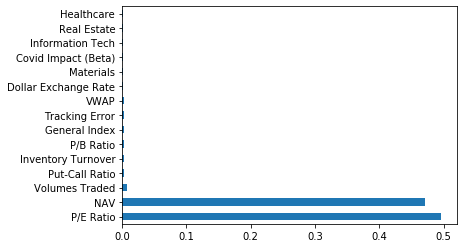

In [20]:
ranked_features=pd.Series(selection.feature_importances_,index=X.columns)
ranked_features.nlargest(15).plot(kind='barh')
plt.show()

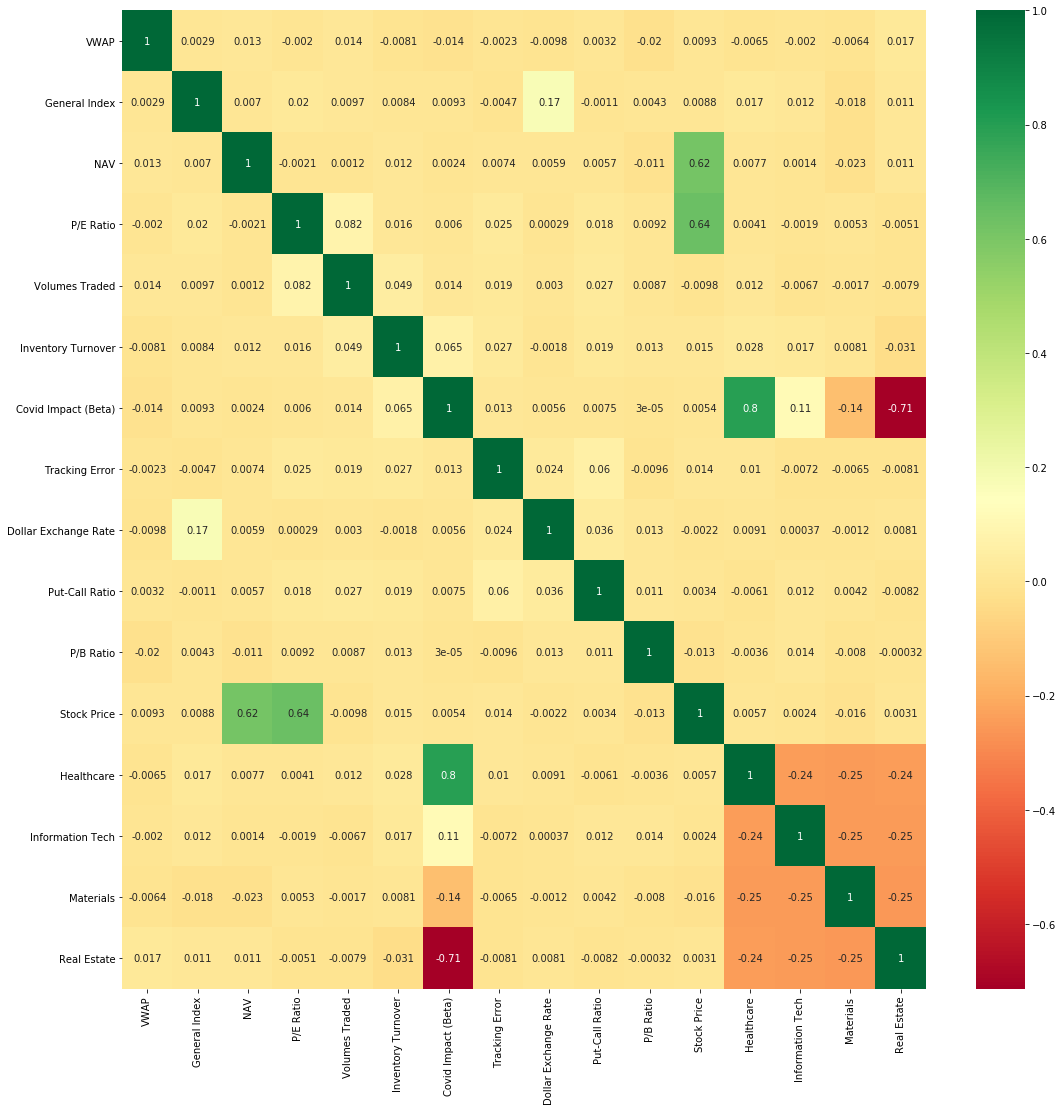

In [21]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [22]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
#Checking with the Ridge regression algorithm
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# load the diabetes datasets

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train,y_train)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.12779e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.13033e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.13032e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.12588e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.124e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: L

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])})

In [24]:
best_random = grid.best_estimator_
y_pred = best_random.predict(X_test)

In [25]:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 125.2045614434843
MSE: 33429.27243612227
RMSE: 182.83673710751424


No handles with labels found to put in legend.


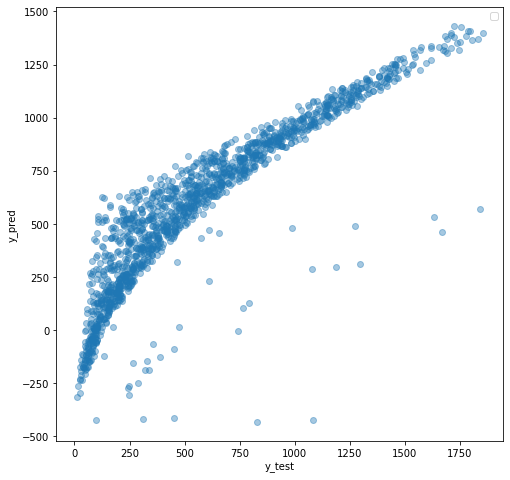

In [26]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha=0.4)

plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.legend()
plt.show()

In [27]:
metrics.r2_score(y_test, y_pred)

0.8082657806736169

In [28]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
y_pred = reg_rf.predict(X_test)

In [30]:

reg_rf.score(X_train, y_train)

0.9960347428361078

In [31]:
reg_rf.score(X_test, y_test)

0.9597712417594774

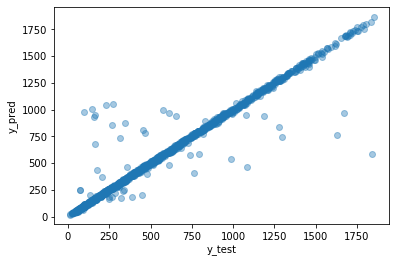

In [32]:

plt.scatter(y_test, y_pred, alpha = 0.4)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

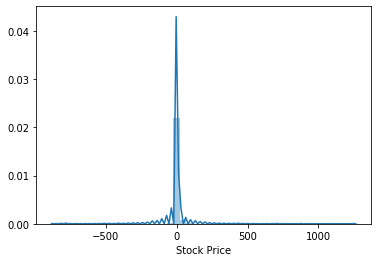

In [33]:
sns.distplot(y_test-y_pred)
plt.show()

In [34]:

from sklearn import metrics

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 18.93526558493865
MSE: 7013.970295516677
RMSE: 83.7494495236636


In [36]:

metrics.r2_score(y_test, y_pred)

0.9597712417594774

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [39]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [40]:

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [41]:

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   7.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [42]:
prediction = rf_random.predict(X_test)

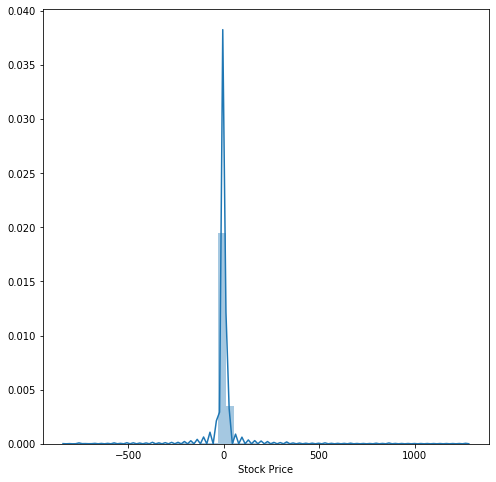

In [43]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()


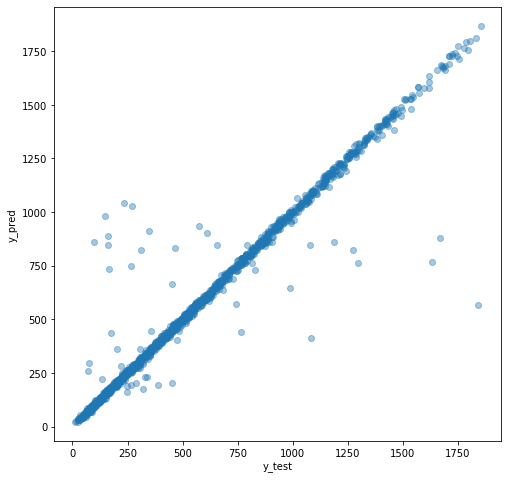

In [44]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.4)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 19.908681565376142
MSE: 6772.750707126433
RMSE: 82.29672355037248


In [46]:
metrics.r2_score(y_test, prediction)

0.9611547612349494

In [47]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 10,
                        n_jobs = 5,
                        verbose=0)

xgb_grid.fit(X_train,
         y_train)

GridSearchCV(cv=10, estimator=XGBRegressor(), n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]})

In [48]:
clf = xgb_grid.best_estimator_
prediction = clf.predict(X_test)

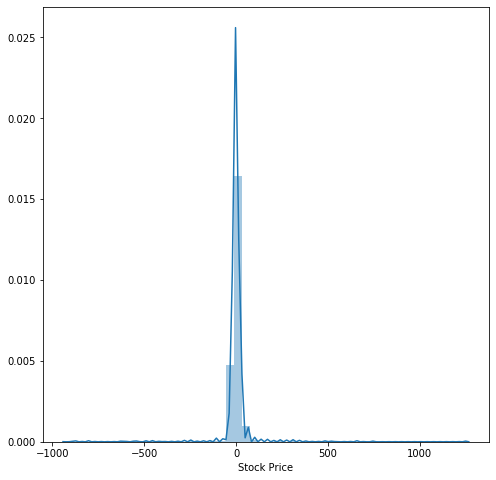

In [49]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

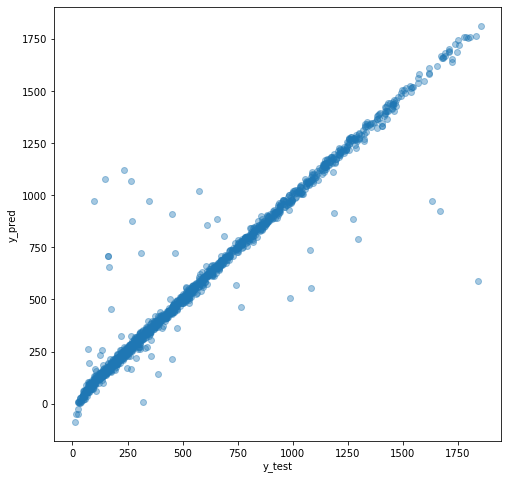

In [50]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.4)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 24.19514869020384
MSE: 6846.945917213613
RMSE: 82.7462743403811


In [52]:
metrics.r2_score(y_test,prediction )

0.9607292132152907

In [53]:
tes=test.copy()
tes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331 entries, 0 to 3330
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           3331 non-null   object 
 1   Index                 3331 non-null   object 
 2   Industry              3331 non-null   object 
 3   VWAP                  3319 non-null   float64
 4   General Index         3060 non-null   float64
 5   NAV                   3056 non-null   float64
 6   P/E Ratio             3039 non-null   float64
 7   Volumes Traded        3283 non-null   float64
 8   Inventory Turnover    3301 non-null   float64
 9   Covid Impact (Beta)   3300 non-null   float64
 10  Tracking Error        3205 non-null   float64
 11  Dollar Exchange Rate  3188 non-null   float64
 12  Put-Call Ratio        2902 non-null   float64
 13  P/B Ratio             3193 non-null   float64
dtypes: float64(11), object(3)
memory usage: 364.5+ KB


In [54]:
Industry=pd.get_dummies(tes['Industry'])
tes=pd.concat([tes,Industry], axis = 1)

In [55]:
tes=tes.drop(['Energy','Industry','Index','Stock Index'],axis=1)
tes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331 entries, 0 to 3330
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   VWAP                  3319 non-null   float64
 1   General Index         3060 non-null   float64
 2   NAV                   3056 non-null   float64
 3   P/E Ratio             3039 non-null   float64
 4   Volumes Traded        3283 non-null   float64
 5   Inventory Turnover    3301 non-null   float64
 6   Covid Impact (Beta)   3300 non-null   float64
 7   Tracking Error        3205 non-null   float64
 8   Dollar Exchange Rate  3188 non-null   float64
 9   Put-Call Ratio        2902 non-null   float64
 10  P/B Ratio             3193 non-null   float64
 11  Healthcare            3331 non-null   uint8  
 12  Information Tech      3331 non-null   uint8  
 13  Materials             3331 non-null   uint8  
 14  Real Estate           3331 non-null   uint8  
dtypes: float64(11), uint8

In [57]:
tes.isnull().sum()

VWAP                     12
General Index           271
NAV                     275
P/E Ratio               292
Volumes Traded           48
Inventory Turnover       30
Covid Impact (Beta)      31
Tracking Error          126
Dollar Exchange Rate    143
Put-Call Ratio          429
P/B Ratio               138
Healthcare                0
Information Tech          0
Materials                 0
Real Estate               0
dtype: int64

In [58]:
tes=tes.fillna(0)

In [59]:
tes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331 entries, 0 to 3330
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   VWAP                  3331 non-null   float64
 1   General Index         3331 non-null   float64
 2   NAV                   3331 non-null   float64
 3   P/E Ratio             3331 non-null   float64
 4   Volumes Traded        3331 non-null   float64
 5   Inventory Turnover    3331 non-null   float64
 6   Covid Impact (Beta)   3331 non-null   float64
 7   Tracking Error        3331 non-null   float64
 8   Dollar Exchange Rate  3331 non-null   float64
 9   Put-Call Ratio        3331 non-null   float64
 10  P/B Ratio             3331 non-null   float64
 11  Healthcare            3331 non-null   uint8  
 12  Information Tech      3331 non-null   uint8  
 13  Materials             3331 non-null   uint8  
 14  Real Estate           3331 non-null   uint8  
dtypes: float64(11), uint8

In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331 entries, 0 to 3330
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           3331 non-null   object 
 1   Index                 3331 non-null   object 
 2   Industry              3331 non-null   object 
 3   VWAP                  3319 non-null   float64
 4   General Index         3060 non-null   float64
 5   NAV                   3056 non-null   float64
 6   P/E Ratio             3039 non-null   float64
 7   Volumes Traded        3283 non-null   float64
 8   Inventory Turnover    3301 non-null   float64
 9   Covid Impact (Beta)   3300 non-null   float64
 10  Tracking Error        3205 non-null   float64
 11  Dollar Exchange Rate  3188 non-null   float64
 12  Put-Call Ratio        2902 non-null   float64
 13  P/B Ratio             3193 non-null   float64
dtypes: float64(11), object(3)
memory usage: 364.5+ KB


In [61]:
predict=rf_random.predict(tes)

In [62]:
id=pd.Series(test["Stock Index"])
submission=pd.DataFrame({'Stock Index':id,'Stock Price':predict})
submission.to_csv("submisson.csv",index=False)